# Data analysis

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
breast_cancer_training = pd.read_csv('breast-cancer-diagnostic.shuf.lrn.csv')
breast_cancer_test = pd.read_csv('breast-cancer-diagnostic.shuf.tes.csv')

In [ ]:
breast_cancer_training.head()

,ID,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,886452,True,13.96,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,...,16.39,22.07,108.10,826.0,0.1512,0.3262,0.3209,0.1374,0.3068,0.07957
1,84348301,True,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
2,9012795,True,21.37,15.10,141.30,1386.0,0.10010,0.15150,0.19320,0.12550,...,22.69,21.84,152.10,1535.0,0.1192,0.2840,0.4024,0.1966,0.2730,0.08666
3,894326,True,18.22,18.87,118.70,1027.0,0.09746,0.11170,0.11300,0.07950,...,21.84,25.00,140.90,1485.0,0.1434,0.2763,0.3853,0.1776,0.2812,0.08198
4,867387,False,15.71,13.93,102.00,761.7,0.09462,0.09462,0.07135,0.05933,...,17.50,19.25,114.30,922.8,0.1223,0.1949,0.1709,0.1374,0.2723,0.07071


In [ ]:
breast_cancer_training['class'].value_counts()

class
False    188
True      97
Name: count, dtype: int64

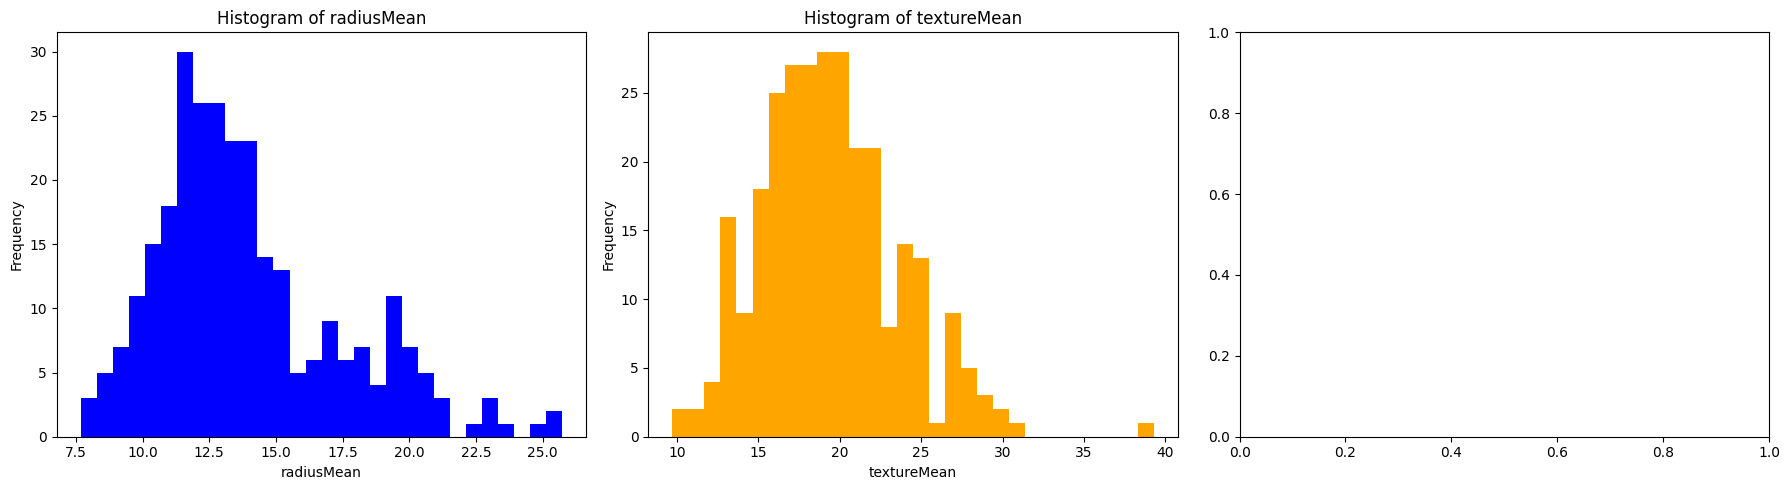

In [ ]:
import matplotlib.pyplot as plt

# Correcting the column names and plotting histograms for radiusMean, textureMean, and symmetryMean
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

breast_cancer_training['radiusMean'].plot(kind='hist', ax=axes[0], color='blue', bins=30)
axes[0].set_title('Histogram of radiusMean')
axes[0].set_xlabel('radiusMean')
axes[0].set_ylabel('Frequency')

breast_cancer_training[' textureMean'].plot(kind='hist', ax=axes[1], color='orange', bins=30)
axes[1].set_title('Histogram of textureMean')
axes[1].set_xlabel('textureMean')
axes[1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()

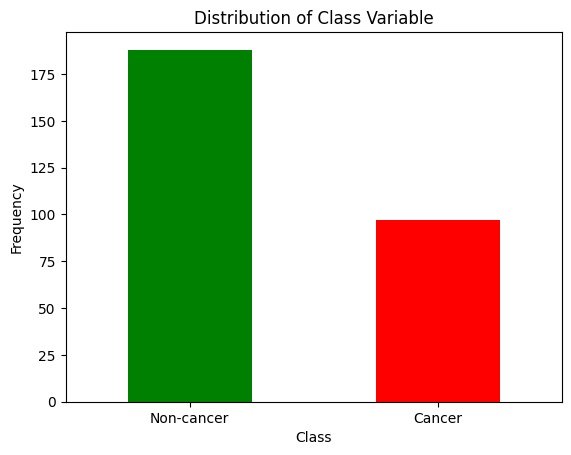

In [ ]:
import matplotlib.pyplot as plt

# Plotting the distribution of the class variable
breast_cancer_training['class'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Class Variable')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Non-cancer', 'Cancer'], rotation=0)
plt.show()

In [ ]:
breast_cancer_training.dtypes

ID                           int64
class                         bool
radiusMean                 float64
 textureMean               float64
 perimeterMean             float64
 areaMean                  float64
 smoothnessMean            float64
 compactnessMean           float64
 concavityMean             float64
 concavePointsMean         float64
 symmetryMean              float64
 fractalDimensionMean      float64
 radiusStdErr              float64
 textureStdErr             float64
 perimeterStdErr           float64
 areaStdErr                float64
 smoothnessStdErr          float64
 compactnessStdErr         float64
 concavityStdErr           float64
 concavePointsStdErr       float64
 symmetryStdErr            float64
 fractalDimensionStdErr    float64
 radiusWorst               float64
 textureWorst              float64
 perimeterWorst            float64
 areaWorst                 float64
 smoothnessWorst           float64
 compactnessWorst          float64
 concavityWorst     

# Preprocessing

Finding missing values

In [ ]:
# checking for missing values in the training dataset
breast_cancer_training.isnull().sum()

ID                         0
class                      0
radiusMean                 0
 textureMean               0
 perimeterMean             0
 areaMean                  0
 smoothnessMean            0
 compactnessMean           0
 concavityMean             0
 concavePointsMean         0
 symmetryMean              0
 fractalDimensionMean      0
 radiusStdErr              0
 textureStdErr             0
 perimeterStdErr           0
 areaStdErr                0
 smoothnessStdErr          0
 compactnessStdErr         0
 concavityStdErr           0
 concavePointsStdErr       0
 symmetryStdErr            0
 fractalDimensionStdErr    0
 radiusWorst               0
 textureWorst              0
 perimeterWorst            0
 areaWorst                 0
 smoothnessWorst           0
 compactnessWorst          0
 concavityWorst            0
 concavePointsWorst        0
 symmetryWorst             0
 fractalDimensionWorst     0
dtype: int64

As you can see, there are no missing values in the testing breast cancer dataset.

Encoding

In [ ]:
# Encoding
from sklearn.preprocessing import LabelEncoder
coder = LabelEncoder()

# Encoding the 'class' column in the training dataset
breast_cancer_training['class'] = coder.fit_transform(breast_cancer_training['class'])

breast_cancer_training[['ID', 'class']].head()

,ID,class
0,886452,1
1,84348301,1
2,9012795,1
3,894326,1
4,867387,0


The 'class' column in the breast cancer training dataset has been successfully encoded, with `1` representing the presence of cancer and `0` representing the absence of cancer.

Dropping irrelevant columns

In [ ]:
# dropping the ID column because it is not relavant for ML model
breast_cancer_training = breast_cancer_training.drop('ID', axis = 1)

Finding outliers

In [ ]:
from scipy.stats import zscore

# Calculate the Z-score of the training data and define threshold
z_scores = np.abs(zscore(breast_cancer_training.select_dtypes(include=[np.number])))
threshold = 3

# Identify outlier rows (rows with at least one outlier)
outlier_rows = np.where((z_scores > threshold).any(axis=1))

# Number of rows that have at least one outlier
num_rows_to_delete = len(outlier_rows[0])
num_rows_to_delete

38

# Standardization of variables

In [ ]:
from sklearn.preprocessing import StandardScaler

# separating features and target variable
X_train = breast_cancer_training.drop('class', axis=1)
y_train = breast_cancer_training['class']

# we will use StandardScaler from scikit-learn to standardise the features
scaler = StandardScaler()

# fitting and transforming the features
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

## Correlations

In [ ]:
# Calculating the correlation matrix for the training dataset
correlation_matrix = breast_cancer_training.corr()
correlation_matrix

,class,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
class,1.000000,0.717735,0.358188,0.733731,0.712221,0.375871,0.605207,0.740842,0.798805,0.376477,...,0.773474,0.440994,0.782988,0.747866,0.479113,0.619760,0.714599,0.831813,0.504957,0.385391
radiusMean,0.717735,1.000000,0.271838,0.997591,0.990831,0.105925,0.477841,0.681792,0.815603,0.174502,...,0.974157,0.277654,0.967159,0.950971,0.114376,0.405025,0.550551,0.754991,0.232632,0.019499
textureMean,0.358188,0.271838,1.000000,0.278902,0.271158,-0.075973,0.206442,0.278867,0.239820,0.108562,...,0.287336,0.907687,0.296806,0.276099,0.067624,0.267215,0.306646,0.265895,0.150946,0.128113
perimeterMean,0.733731,0.997591,0.278902,1.000000,0.990050,0.146043,0.532711,0.724682,0.847265,0.213712,...,0.975218,0.285486,0.974047,0.952925,0.147413,0.449759,0.589009,0.783295,0.262964,0.065629
areaMean,0.712221,0.990831,0.271158,0.990050,1.000000,0.120772,0.485747,0.695692,0.826119,0.187898,...,0.972201,0.268507,0.966683,0.967764,0.128921,0.398743,0.546514,0.749190,0.229773,0.031199
smoothnessMean,0.375871,0.105925,-0.075973,0.146043,0.120772,1.000000,0.658907,0.502683,0.514487,0.552013,...,0.176125,0.009760,0.204702,0.181194,0.836374,0.502851,0.448547,0.496176,0.474456,0.555582
compactnessMean,0.605207,0.477841,0.206442,0.532711,0.485747,0.658907,1.000000,0.897969,0.835257,0.633287,...,0.523907,0.242741,0.579419,0.515523,0.590983,0.865807,0.816981,0.802274,0.587927,0.706006
concavityMean,0.740842,0.681792,0.278867,0.724682,0.695692,0.502683,0.897969,1.000000,0.939265,0.518916,...,0.712615,0.318460,0.756668,0.708727,0.485940,0.792357,0.896479,0.884722,0.505348,0.550490
concavePointsMean,0.798805,0.815603,0.239820,0.847265,0.826119,0.514487,0.835257,0.939265,1.000000,0.494025,...,0.842378,0.278622,0.869964,0.835321,0.472494,0.692407,0.787640,0.922834,0.469854,0.415536
symmetryMean,0.376477,0.174502,0.108562,0.213712,0.187898,0.552013,0.633287,0.518916,0.494025,1.000000,...,0.225546,0.122510,0.261570,0.224492,0.440091,0.480533,0.426392,0.445463,0.742906,0.434217


## Finding the best parameters with Grid search

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import time

X_standardized = X_train_scaled
X_train_split_std, X_test_hold_std, y_train_split_std, y_test_hold_std = train_test_split(X_standardized, y_train, test_size=0.2, random_state=42)


# Defining the models
models = {
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

# Parameter grid for grid search
param_grid = {
    "Naive Bayes": {'var_smoothing': np.logspace(0,-9, num=100)},
    "SVM": {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']},
    "Random Forest": {'n_estimators': [10, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
}

# K-fold cross-validator
kfold = StratifiedKFold(n_splits=5)

# Function to perform grid search and evaluate model
def evaluate_model(model, parameters, X, y):
    start_time = time.time()
    grid_search = GridSearchCV(model, parameters, cv=kfold, scoring='accuracy')
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_
    scores = cross_val_score(best_model, X, y, cv=kfold)

    best_model.fit(X_train_split_std, y_train_split_std)
    y_pred = best_model.predict(X_test_hold_std)
    accuracy_ho = accuracy_score(y_test_hold_std, y_pred)
    recall_ho = recall_score(y_test_hold_std, y_pred)
    precision_ho = precision_score(y_test_hold_std, y_pred)
    f1_ho = f1_score(y_test_hold_std, y_pred)
    
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"\nCV")
    print(f"Accuracy: {np.mean(scores):.3f} (+/- {np.std(scores) * 2:.3f})")
    print(f"Recall: {np.mean(cross_val_score(best_model, X, y, cv=kfold, scoring='recall')):.3f}")
    print(f"Precision: {np.mean(cross_val_score(best_model, X, y, cv=kfold, scoring='precision')):.3f}")
    print(f"F1 Score: {np.mean(cross_val_score(best_model, X, y, cv=kfold, scoring='f1')):.3f}")
    
    print(f"\n Holdout")
    print(f"Accuracy: ", accuracy_ho)
    print(f"Recall: ", recall_ho)
    print(f"Precision: ", precision_ho)
    print(f"F1 Score: ", f1_ho)
    print(f"Time Taken: {time.time() - start_time:.2f} seconds")
    print("\n")

# Evaluating models on the standardized dataset
print("Evaluating on the standardized dataset:\n")
for name, model in models.items():
    print(f"Model: {name}")
    evaluate_model(model, param_grid[name], X_standardized, y_train)

Evaluating on the standardized dataset:

Model: Naive Bayes
Best Parameters: {'var_smoothing': 0.1}

CV
Accuracy: 0.944 (+/- 0.041)
Recall: 0.907
Precision: 0.931
F1 Score: 0.917

 Holdout
Accuracy:  0.9824561403508771
Recall:  0.9583333333333334
Precision:  1.0
F1 Score:  0.9787234042553191
Time Taken: 4.80 seconds


Model: SVM
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

CV
Accuracy: 0.986 (+/- 0.026)
Recall: 0.958
Precision: 1.000
F1 Score: 0.978

 Holdout
Accuracy:  1.0
Recall:  1.0
Precision:  1.0
F1 Score:  1.0
Time Taken: 1.12 seconds


Model: Random Forest
Best Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 10}

CV
Accuracy: 0.944 (+/- 0.041)
Recall: 0.917
Precision: 0.949
F1 Score: 0.931

 Holdout
Accuracy:  0.9649122807017544
Recall:  0.9166666666666666
Precision:  1.0
F1 Score:  0.9565217391304348
Time Taken: 54.73 seconds




In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import time

# Initialize classifiers with default parameters
nb_classifier = GaussianNB()
svm_classifier = SVC()
rf_classifier = RandomForestClassifier()

# Data split for hold-out method
X_train_split_non_std, X_test_hold_non_std, y_train_split_non_std, y_test_hold_non_std = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train_split_std, X_test_hold_std, y_train_split_std, y_test_hold_std = train_test_split(X_standardized, y_train, test_size=0.2, random_state=42)

# Function to evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_ho = accuracy_score(y_test, y_pred)
    recall_ho = recall_score(y_test, y_pred)
    precision_ho = precision_score(y_test, y_pred)
    f1_ho = f1_score(y_test, y_pred)
    
    accuracy_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy').mean()
    recall_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='recall').mean()
    precision_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='precision').mean()
    f1_cv = cross_val_score(model, X_train, y_train, cv=5, scoring='f1').mean()
    end_time = time.time()
    
    metrics = {'Accuracy (Hold-out)': accuracy_ho, 'Recall (Hold-out)': recall_ho, 'Precision (Hold-out)': precision_ho, 'F1 Score (Hold-out)': f1_ho, 'Accuracy (CV)': accuracy_cv, 'Recall (CV)': recall_cv, 'Precision (CV)': precision_cv, 'F1 Score (CV)': f1_cv, 'Time Taken': end_time - start_time}
    return metrics

# Evaluate models on non-standardized data
print("Evaluating models on non-standardized data:\n")
results_non_std = {}
for name, model in [("Naive Bayes", nb_classifier), ("SVM", svm_classifier), ("Random Forest", rf_classifier)]:
    print(f"Model: {name}")
    results = evaluate_model(model, X_train_split_non_std, y_train_split_non_std, X_test_hold_non_std, y_test_hold_non_std)
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

# Evaluate models on standardized data
print("Evaluating models on standardized data:\n")
results_std = {}
for name, model in [("Naive Bayes", nb_classifier), ("SVM", svm_classifier), ("Random Forest", rf_classifier)]:
    print(f"Model: {name}")
    results = evaluate_model(model, X_train_split_std, y_train_split_std, X_test_hold_std, y_test_hold_std)
    for metric, value in results.items():
        print(f"{metric}: {value:.4f}")
    print("\n")

Evaluating models on non-standardized data:

Model: Naive Bayes
Accuracy (Hold-out): 0.9825
Recall (Hold-out): 0.9583
Precision (Hold-out): 1.0000
F1 Score (Hold-out): 0.9787
Accuracy (CV): 0.9387
Recall (CV): 0.9057
Precision (CV): 0.9071
F1 Score (CV): 0.9043
Time Taken: 0.1110


Model: SVM
Accuracy (Hold-out): 0.9298
Recall (Hold-out): 0.8333
Precision (Hold-out): 1.0000
F1 Score (Hold-out): 0.9091
Accuracy (CV): 0.8861
Recall (CV): 0.6867
Precision (CV): 0.9470
F1 Score (CV): 0.7931
Time Taken: 0.1197


Model: Random Forest
Accuracy (Hold-out): 0.9825
Recall (Hold-out): 0.9583
Precision (Hold-out): 1.0000
F1 Score (Hold-out): 0.9787
Accuracy (CV): 0.9563
Recall (CV): 0.8781
Precision (CV): 0.9309
F1 Score (CV): 0.9140
Time Taken: 2.9366


Evaluating models on standardized data:

Model: Naive Bayes
Accuracy (Hold-out): 0.9825
Recall (Hold-out): 0.9583
Precision (Hold-out): 1.0000
F1 Score (Hold-out): 0.9787
Accuracy (CV): 0.9300
Recall (CV): 0.9057
Precision (CV): 0.8833
F1 Score (C

## Preprocessing on testing data

In [ ]:
breast_cancer_test

,ID,radiusMean,textureMean,perimeterMean,areaMean,smoothnessMean,compactnessMean,concavityMean,concavePointsMean,symmetryMean,...,radiusWorst,textureWorst,perimeterWorst,areaWorst,smoothnessWorst,compactnessWorst,concavityWorst,concavePointsWorst,symmetryWorst,fractalDimensionWorst
0,9012568,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,0.1721,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.1362,0.08178,0.2487,0.06766
1,844981,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
2,8813129,13.27,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,...,15.14,23.60,98.84,708.8,0.1276,0.1311,0.1786,0.09678,0.2506,0.07623
3,881094802,17.42,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,...,18.07,28.07,120.40,1021.0,0.1243,0.1793,0.2803,0.10990,0.1603,0.06818
4,88350402,13.64,15.60,87.38,575.3,0.09423,0.06630,0.04705,0.03731,0.1717,...,14.85,19.05,94.11,683.4,0.1278,0.1291,0.1533,0.09222,0.2530,0.06510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,9010598,12.76,18.84,81.87,496.6,0.09676,0.07952,0.02688,0.01781,0.1759,...,13.75,25.99,87.82,579.7,0.1298,0.1839,0.1255,0.08312,0.2744,0.07238
280,862485,11.60,12.84,74.34,412.6,0.08983,0.07525,0.04196,0.03350,0.1620,...,13.06,17.16,82.96,512.5,0.1431,0.1851,0.1922,0.08449,0.2772,0.08756
281,8910506,12.87,16.21,82.38,512.2,0.09425,0.06219,0.03900,0.01615,0.2010,...,13.90,23.64,89.27,597.5,0.1256,0.1808,0.1992,0.05780,0.3604,0.07062
282,8812877,15.75,20.25,102.60,761.3,0.10250,0.12040,0.11470,0.06462,0.1935,...,19.56,30.29,125.90,1088.0,0.1552,0.4480,0.3976,0.14790,0.3993,0.10640


In [ ]:
# Dropping ID column in testing data
breast_cancer_test_without_ID = breast_cancer_test.drop('ID', axis=1)

# Scale the features of the breast_cancer_test dataset using the same scaler used for the training data
X_test_scaled = scaler.transform(breast_cancer_test_without_ID)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=breast_cancer_test_without_ID.columns)

## Final prediction on test data

In [ ]:
# Initializing the SVM model with the best parameters from the grid search
svm_best = SVC(C=0.1, gamma='scale', kernel='linear')

# Training the SVM model on the scaled training data
svm_best.fit(X_train_scaled, y_train)

# Predicting the values for the scaled test data
y_test_pred = svm_best.predict(X_test_scaled)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
# Reverse encoding on y_test_pred to convert 0 and 1 back to False and True respectively
y_test_pred_bool = coder.inverse_transform(y_test_pred)

# merging the ID column with the predicted values
solution = pd.DataFrame({'ID': breast_cancer_test['ID'], 'Class': y_test_pred_bool})

# saving the solution in the csv file
solution.to_csv('solution.csv', index=False)

solution

,ID,Class
0,9012568,False
1,844981,True
2,8813129,False
3,881094802,False
4,88350402,False
...,...,...
279,9010598,False
280,862485,False
281,8910506,False
282,8812877,True


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ede9c305-40ce-4946-a04c-086638645822' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>